# 실습 문제 1:  
$y = exp^{-x/10}sin(x)$

 consider 10000 x intervals in the range [0,10]

### try:

1. plot the function y vers x  in the range [0,10]


2. compute the mean and std of y for x values in [4,7]


3. for x in the range [4,7],find the value $y_{m}$ such that 95% of y values are less than $y_{m}$ 


4. plot $dy/dx$ vers $x$

5. find the locations where $dy/dx =0 $

#1
#2
mean -0.29563628639320116
std 0.3144532369395424
#3
std 0.27056448813742756
#4
#5
[1.4711276743037347, 4.612720327893528, 7.754312981483321]


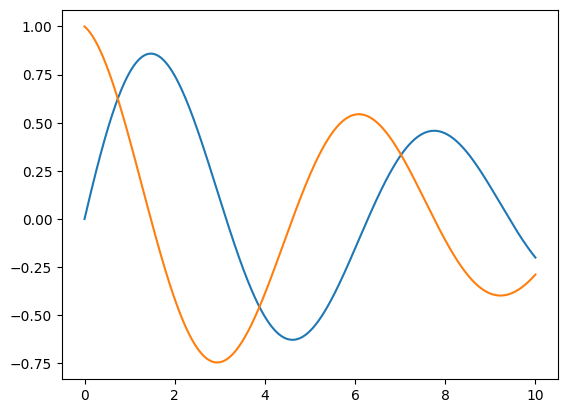

In [1]:
%%timeit

import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x = np.linspace(0,10,10000)
y = 1/np.exp(x/10) * np.sin(x)

print("#1")
plt.plot(x,y)

print("#2")
print("mean", np.mean(y[4000:7000]))
print("std", np.std(y[4000:7000]))

print("#3")
print("std", np.percentile(y[4000:7000], 95))

print("#4")
dydx = np.gradient(y,x)
plt.plot(x,dydx)

print("#5")
# print(dydx[dydx == 0])
x = sp.Symbol('x')
equation = sp.exp(-x/10) * sp.sin(x)
derivative = sp.diff(equation, x)

print(list(map(float,sp.solveset(derivative, x, domain = sp.Interval(0, 10))))) # atan10

# 실습문제 2:

sum together every number from 0 to 10000 except for those than can be divided by 4 or 7 . Do this 
one line 

In [ ]:
print(sum(i for i in range(28) if i%4 == 0 or i%7 == 0))

# 실습문제 3
Polar coordinate system

consider the flower petal $r(\theta) = 1 + \frac{3}{4}  sin(3\theta)$ for $0 \leq \theta \leq 2\pi$

1. make a plot of the flower (xy point)
2. compute the area using the calculus formula $A = \int_{0}^{2\pi}\frac{1}{2}r^{2}d\theta$ 
3. compute the arclength using the calculus formula $L = \int_{0}^{2\pi}\sqrt{r^{2}+(\frac{dr}{d\theta})^{2}}d\theta$

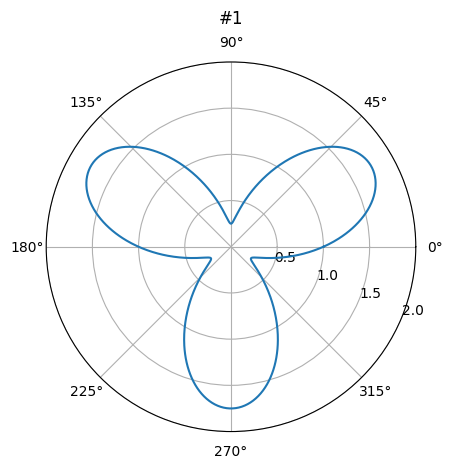

#2
4.02516558741192
#3
11.624988519


In [2]:
%%timeit

# modified from official tutorial
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

theta = np.linspace(0, 2*np.pi, 1000)
r = 1 + np.sin(3*theta)*0.75

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(1)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("#1", va='bottom')
plt.show()

print("#2")
t = sp.Symbol('t')
r = 1 + sp.sin(3*t)*0.75
print(sp.integrate(r**2/2, (t, 0, 2*sp.pi)).n())

print("#3")
drdt = sp.diff(r, t)
print(sp.integrate(sp.sqrt(r**2 + drdt**2), (t, 0, 2*sp.pi)).n())

# 실습문제 4:

the power emitted by a blackbody is $P = A\sigma\epsilon T^4$ after measuring the temperature of  a star you find that $T(t)=T_0 \frac{1}{1+e^{-kt}}$. plot the total energy emitted by the star as a function of time using the fact that $E(t) = \int_{t'=0}^{t'=t}P(t')dt'$

[hint:Dimensionless quantity](https://en.wikipedia.org/wiki/Dimensionless_quantity)
  

$ P/A \sigma \epsilon =T^4$

$ P/(A \sigma \epsilon  T_0^4)= \left( \frac{1}{1+e^{-kt}}\right)^4$ from   $T(t)=T_0 \frac{1}{1+e^{-kt}}$   
keep kt together

kt =np.linspace(0,3,100) no demention k is inverse unit of time experentional argument is dementionless
  Power = (1/(1+np.exp(-kt)))**4

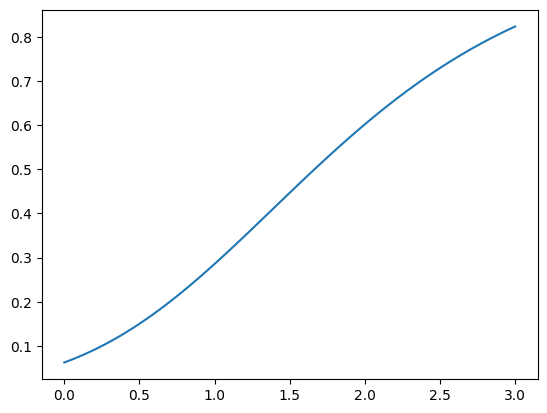

In [3]:
%%timeit

import matplotlib.pyplot as plt
import numpy as np

C = 1
kt = np.linspace(0,3,100)
y = C*(1/(1+np.exp(-kt)))**4

plt.plot(kt,y)